In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 

In [67]:
# 2. Create NumPy arrays X and y from the data.  The target variable y should come from column 'prp' of df.  For X, choose two other columns of df.  
x = df[['cs', 'cach']].values
y = df['prp'].values

In [68]:
# 3. Create training and test sets using train_test_split().  Use Scikit-Learn's LinearRegression class to create a linear model from X_train and y_train.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=23)
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [69]:
# 4. What are the coefficients of your model?
print(f'intercept: {reg.intercept_:.3f}, cs: {reg.coef_[0]:.3f}, cach: {reg.coef_[1]:.3f}')

intercept: -15.521, cs: 5.109, cach: 2.105


In [70]:
# 5. Are both the predictor variables of your model important in predicting ‘prp’?
'''
They don't appear to carry much weight. CS seems to have more influence.
'''


"\nThey don't appear to carry much weight. CS seems to have more influence.\n"

In [71]:
# 6. What is the R-squared value for your model?  (Use X_train and y_train to get the R-squared value.)  Did you get a good R-squared value?  What's the best possible R-squared value?
predicted = reg.predict(x_test)
print(f'R-Score: {reg.score(x_train, y_train):.3f}')

'''
The best R-squared values would have been a 1
'''

R-Score: 0.552


'\nThe best R-squared values would have been a 1\n'

Text(0.5, 1.0, 'predicted vs actual')

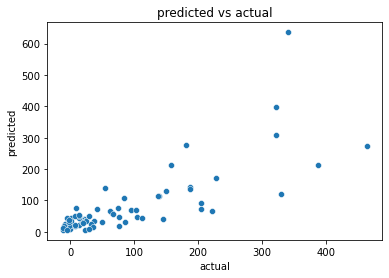

In [72]:
# 7. Produce a scatterplot in which the predicted prp values are shown on the x axis and the actual prp values are shown on the y axis.
sns.scatterplot(x=predicted, y=y_test)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("predicted vs actual")


In [73]:
# 8. Repeat steps 2-7 using a different pair of predictor variables.
# model data
x = df[['erp', 'mmax']].values
y = df['prp'].values
# split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=23)
# train
reg2 = LinearRegression()
reg2.fit(x_train, y_train)
print(f'intercept: {reg2.intercept_:.3f}, erp: {reg2.coef_[0]:.3f}, mmax: {reg2.coef_[1]:.6f}')
'''
These do not seem to carry as much weight as the last 2.
'''
# predict
predict2 = reg2.predict(x_test)
print(f'R-Score: {reg2.score(x_train, y_train):.3f}')

intercept: 6.150, erp: 1.044, mmax: -0.000370
R-Score: 0.940


Text(0.5, 1.0, 'predicted vs actual')

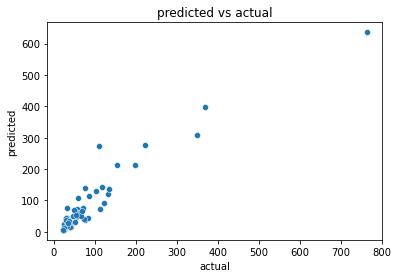

In [74]:
sns.scatterplot(x=predict2, y=y_test)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("predicted vs actual")

In [75]:
# 9. Repeat steps 2-7 using all predictor variables.  Which predictors appear to be most important?
# model data
x = df[['chmin', 'chmax']].values
y = df['prp'].values
# split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=23)
# train
reg2 = LinearRegression()
reg2.fit(x_train, y_train)
print(f'intercept: {reg2.intercept_:.3f}, erp: {reg2.coef_[0]:.3f}, mmax: {reg2.coef_[1]:.6f}')
'''
These do not seem to carry as much weight as the last 2.
'''
# predict
predict2 = reg2.predict(x_test)
print(f'R-Score: {reg2.score(x_train, y_train):.3f}')

intercept: -12.272, erp: 14.865, mmax: 3.415457
R-Score: 0.660


Text(0.5, 1.0, 'predicted vs actual')

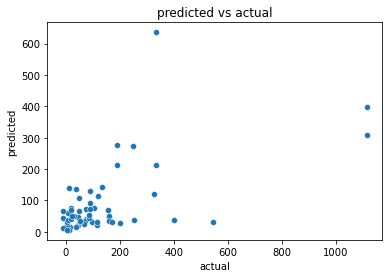

In [76]:
sns.scatterplot(x=predict2, y=y_test)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("predicted vs actual")

In [77]:
'''
The predictors that appear to be the most important are erp and nmax. They have the cloeses to 1 R-score.
'''

'\nThe predictors that appear to be the most important are\n'